# ANALYZE EXPERIMENTS

In [1]:
import smarte.constants as cn
import smarte as smt
from smarte.analysis.anova import Anova

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from io import StringIO
import zipfile

# Defintitions

* **Log error ratio of a parameter estimate**, $e$. Let $p$ be the true value of a positive valued parameter and $\hat{p}$ be its estimated value.
$e = log_2 \frac{\hat{p}}{p}$.

# Helpers

# Data Overview

In [2]:
PROVIDER = smt.ExperimentProvider()
DF = PROVIDER.df
DF.head()

,biomodel_num,columns_deleted,max_fev,method,noise_mag,latincube_idx,range_min_frac,range_max_frac,ts_instance,index,num_species,num_reaction,num_parameter,median_err,max_err,min_err,rssq,avg_time,cnt,tot_time
0,1,0,1000,differential_evolution,0.1,1,0.5,2.0,1,0.0,12.0,17.0,35.0,0.183709,0.999112,-0.020618,2.141837e-07,0.000195,1001.0,0.195356
1,1,0,1000,differential_evolution,0.1,1,0.5,2.0,2,0.0,12.0,17.0,35.0,0.418409,-0.997113,-0.022271,2.168168e-07,0.000198,1001.0,0.197768
2,1,0,1000,differential_evolution,0.1,1,0.5,2.0,3,0.0,12.0,17.0,35.0,0.224564,1.000000,0.093372,2.156352e-07,0.000177,1001.0,0.177638
3,1,0,1000,differential_evolution,0.1,1,0.5,2.0,4,0.0,12.0,17.0,35.0,0.237401,0.999966,0.039410,2.138009e-07,0.000178,1001.0,0.178542
4,1,0,1000,differential_evolution,0.1,1,0.5,2.0,5,0.0,12.0,17.0,35.0,0.237401,0.999966,0.039410,2.147728e-07,0.000196,1001.0,0.196658


In [3]:
len(DF)

239305

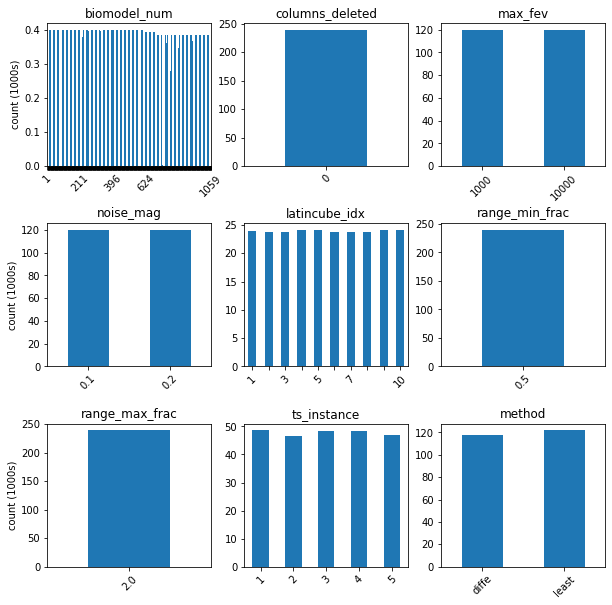

In [4]:
PROVIDER.plotFactorCounts(exclude_factors=[])

# H: Accuracy increases with the number of function evaluations

In [5]:
cn.SD_CONDITIONS

['biomodel_num',
 'columns_deleted',
 'max_fev',
 'method',
 'noise_mag',
 'latincube_idx',
 'range_min_frac',
 'range_max_frac',
 'ts_instance']

In [12]:
CONDITION_DCT = {}
for factor in cn.SD_CONDITIONS:
    CONDITION_DCT[factor] = list(set(DF[factor]))

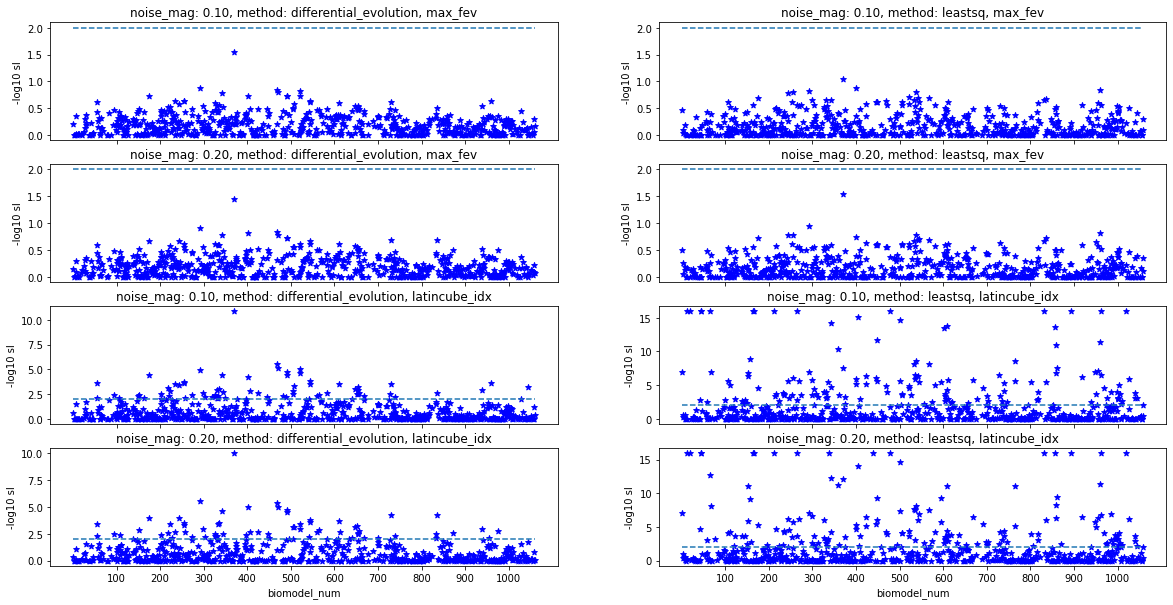

In [18]:
# Plot different conditions to see if there's an effect
factors = [cn.SD_MAX_FEV, cn.SD_LATINCUBE_IDX]
num_row = 4
num_col = 2
fig, axes = plt.subplots(num_row, num_col, figsize=(20, 10))
irow = 0
icol = 0
for factor in factors:
    for noise_mag in CONDITION_DCT[cn.SD_NOISE_MAG]:
        for method in CONDITION_DCT[cn.SD_METHOD]:
            ax = axes[irow, icol]
            icol += 1
            df = DF[DF[cn.SD_NOISE_MAG] == noise_mag]
            df = df[df[cn.SD_METHOD] == method]
            title_prefix = "noise_mag: %2.2f, method: %s, " % (noise_mag, method)
            Anova.plotSl(df, factor, cn.SD_TS_INSTANCE, cn.SD_MEDIAN_ERR, is_plot=False, title_prefix=title_prefix, ax=ax)
            if irow >= num_row - 1:
                pass
            else:
                ax.set_xlabel("")
                ax.set_xticklabels([])
            if icol >= num_col:
                icol = 0
                irow += 1
plt.show()

**Questions**
1. What is the decrease in median error by using the best latincube_idx? Let $\bar{e}$ be the median error ratio averaged across all
latincube_idx and let $e^{\star}$ be the (log2) median error ratio for the minimum residual sum of squares. Plot $|\bar{e}| - |e^{\star}|$ for factor levels of noise_mag, method, and max_fev.
1. Let $e^{\star}_k$ be the error resulting from using estimates for the lowest rssq for $k$ latincubes. Plot these two ($k$ is x-axis).
1. How does the number of parameters influence the above curve?

# H: Number of random restarts is more effective if there are fewer parameters to estimate.

# Analyze variability by replication

In [ ]:
dfg = DF.groupby(cn.SD_BIOMODEL_NUM)
mean_df = pd.DataFrame(dfg.mean().compute())
std_df = pd.DataFrame(dfg.std().compute())
cv_df = pd.DataFrame(cnt_std/cnt_mean)

In [ ]:
plt.hist(cv_df[cn.SD_CNT])
_ = plt.title("CV of Count of Function Evaluations")

In [ ]:
_ = plt.hist(mean_df[cn.SD_CNT], bins=100, cumulative=True, density=True)
_ = plt.title("Mean Number of Function Evaluations")

In [ ]:
_ = plt.hist(mean_df[cn.SD_MEDIAN_ERR], bins=100, cumulative=True, density=True)
_ = plt.title("Median Log2 Actual/True")

In [ ]:
plt.scatter(mean_df[cn.SD_MEDIAN_ERR], mean_df[cn.SD_CNT])
plt.xlabel("median err")
plt.ylabel("function evaluations")